In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [14]:
assets = ['DX-Y.NYB', 'GC=F']
timeframe = '1d'
start = '2023-01-01'
end = '2023-12-31'
correlation_coefficient_length = 20

In [15]:
df = yf.download(assets, period=timeframe, start=start, end=end)['Adj Close']
df.columns.name = None 
df.head(5)

[*********************100%%**********************]  2 of 2 completed


,DX-Y.NYB,GC=F
Date,,
2023-01-03,104.519997,1839.699951
2023-01-04,104.250000,1852.800049
2023-01-05,105.040001,1834.800049
2023-01-06,103.879997,1864.199951
2023-01-09,103.000000,1872.699951


In [16]:
df.corr()

,DX-Y.NYB,GC=F
DX-Y.NYB,1.000000,-0.446202
GC=F,-0.446202,1.000000


In [17]:
rolling_corr = df[assets[0]].rolling(window=20).corr(df[assets[1]])
rolling_corr

df['rolling_corr'] = rolling_corr
df.dropna(inplace=True)
df

,DX-Y.NYB,GC=F,rolling_corr
Date,,,
2023-01-31,102.099998,1929.500000,-0.965472
2023-02-01,101.220001,1927.800049,-0.948601
2023-02-02,101.750000,1916.300049,-0.934570
2023-02-03,102.919998,1862.900024,-0.895050
2023-02-06,103.620003,1866.199951,-0.900287
...,...,...,...
2023-12-22,101.699997,2057.100098,-0.485711
2023-12-26,101.470001,2058.199951,-0.539395
2023-12-27,100.989998,2081.899902,-0.628686


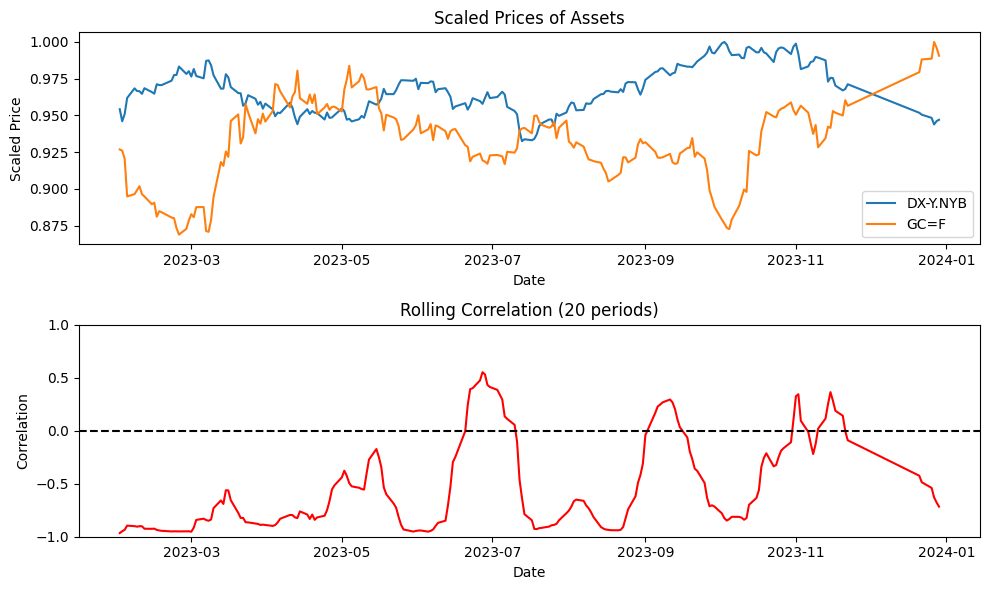

In [18]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the scaled prices of the two assets
plt.subplot(2, 1, 1)
plt.plot(df.index, df[assets[0]] / df[assets[0]].max(), label=assets[0])
plt.plot(df.index, df[assets[1]] / df[assets[1]].max(), label=assets[1])
plt.title('Scaled Prices of Assets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()

# Plot the rolling correlation
plt.subplot(2, 1, 2)
plt.plot(df.index, df['rolling_corr'], color='red')
plt.title('Rolling Correlation (20 periods)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.axhline(y=0, color='black', linestyle='--')  # Adding a horizontal line at correlation 0
plt.ylim(-1, 1)  # Setting y-axis limit from -1 to 1 for correlation values
plt.tight_layout()

plt.show()